Problem Statement

We are working on Income prediction problem associated with the Adult Income Census dataset.The goal is to accurately predict whether or not person is making more or less than $50,000 a year.While working through this problem statement

In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
import os 

os.chdir("..")
os.getcwd()

'c:\\project\\ML_pipeline_project\\ml_pipeline_project'

In [3]:
data = pd.read_csv("adult.csv")

In [4]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
data.shape

(48842, 15)

In [6]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [10]:
data.duplicated().sum()

52

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
categorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns

In [14]:
categorical_features

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [15]:
numerical_features

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [16]:
data['workclass'].value_counts()

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [17]:
for i in categorical_features:
    print(i,data[i].unique())

    print()
    print("**********separated_columns************")
    print()

workclass ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

**********separated_columns************

education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']

**********separated_columns************

marital-status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

**********separated_columns************

occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']

**********separated_columns************

relationship ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']

**********separated_columns************

race ['B

In [18]:
data["workclass"] = data["workclass"].replace("?","Private")
data["occupation"]=data["occupation"].replace("?","Prof-speciality")

In [19]:
data["native_country"] = data["native-country"].replace("?","United-States")

Data Visualization

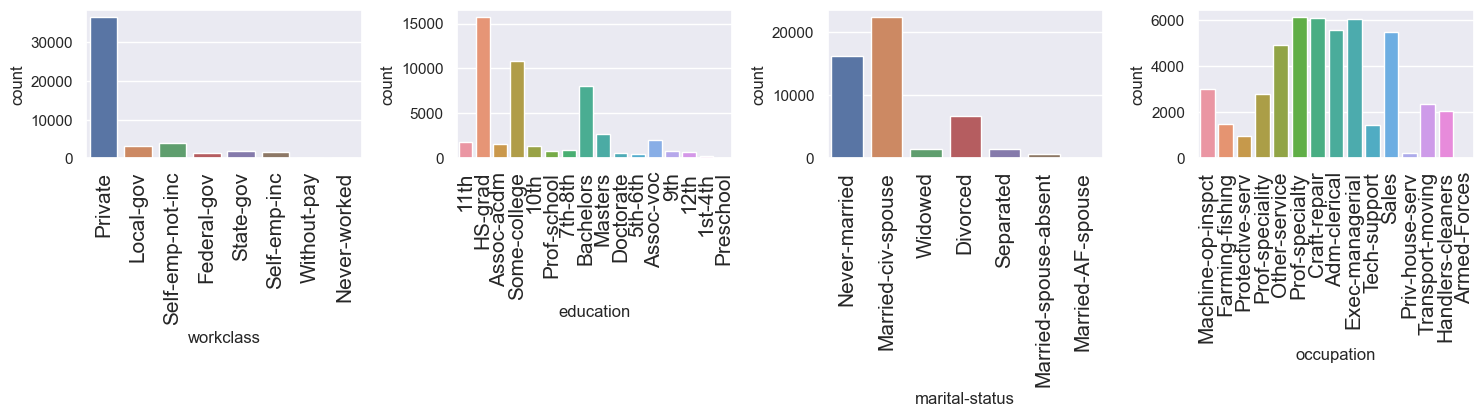

In [20]:
plt.style.use("fivethirtyeight")
sns.set(rc={"figure.figsize":(15,6)})

columns1 = ['workclass','education','marital-status','occupation']

for i in range(0,len(columns1)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=data[columns1[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

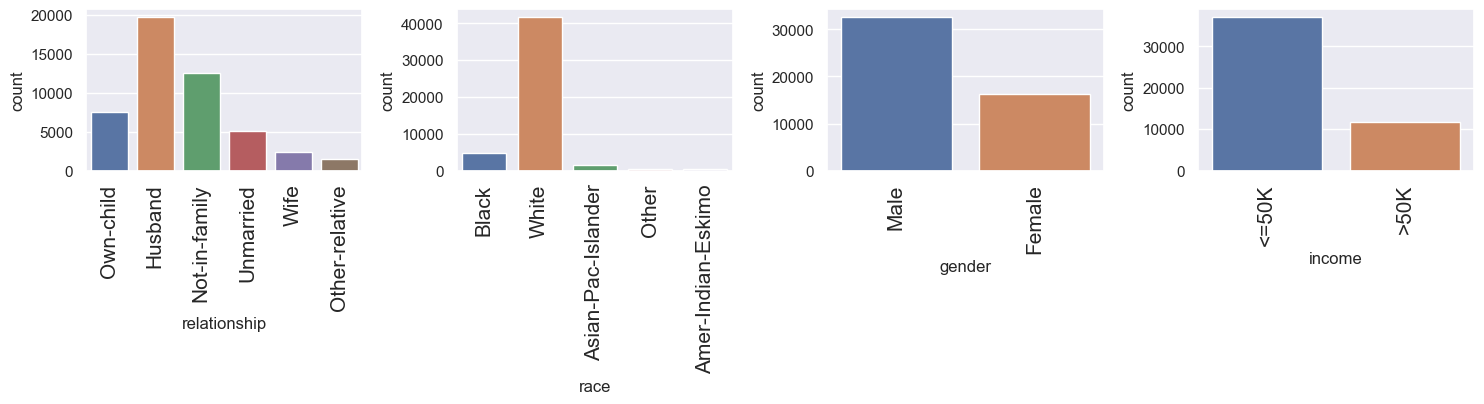

In [21]:
columns2 = ['relationship','race','gender','income']

for i in range(0,len(columns2)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=data[columns2[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

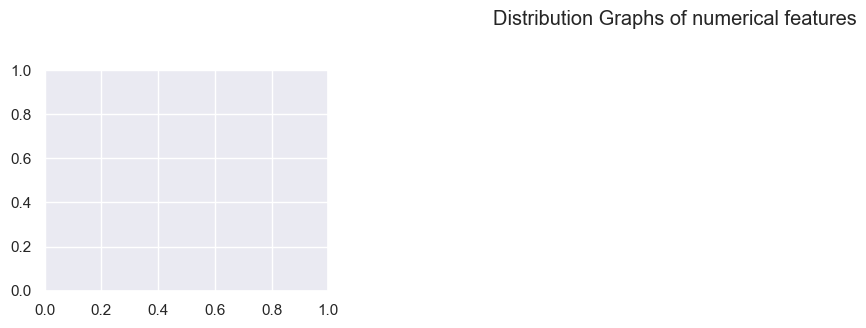

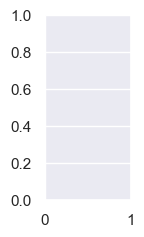

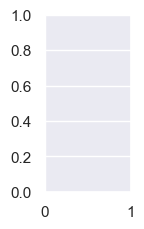

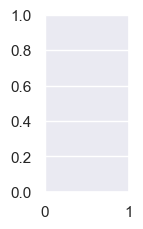

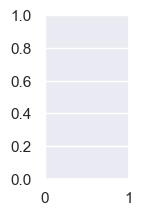

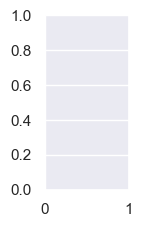

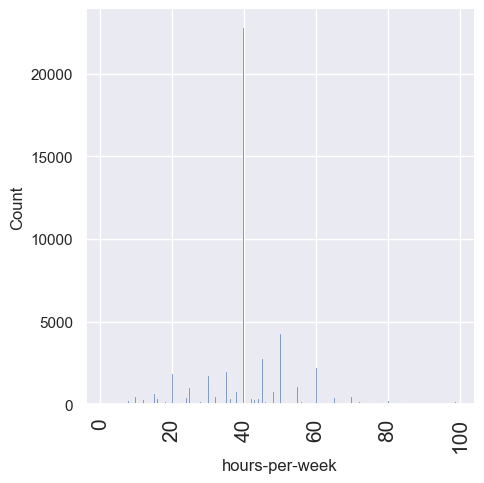

In [22]:
plt.suptitle("Distribution Graphs of numerical features")
for i in range(0,len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.displot(x=data[numerical_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

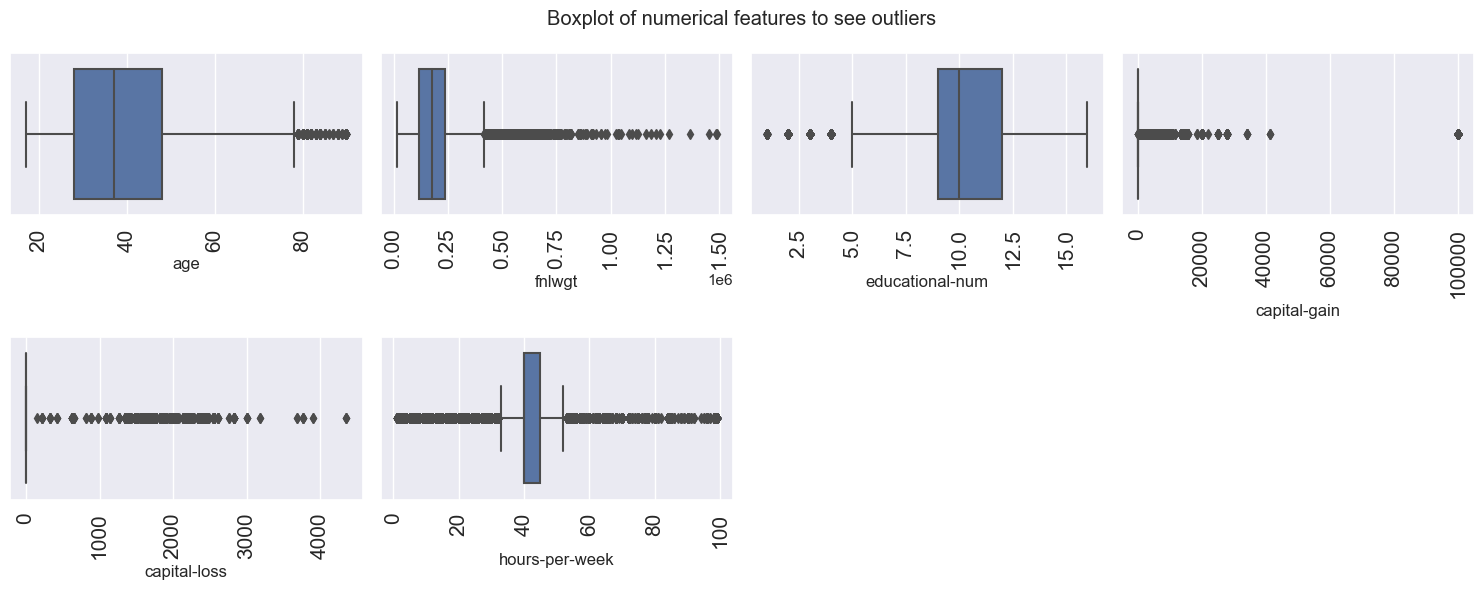

In [23]:
plt.suptitle("Boxplot of numerical features to see outliers")
for i in range(0,len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=data[numerical_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

In [24]:
def detect_outliers(col):
    # Finding the IQR
    percentile25 = data[col].quantile(0.25)
    percentile75 = data[col].quantile(0.75)
    print('\n ####', col , '####')
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    data.loc[(data[col]>upper_limit), col]= upper_limit
    data.loc[(data[col]<lower_limit), col]= lower_limit    
    return data

In [25]:
for col in numerical_features:
         detect_outliers(col)


 #### age ####
percentile25 28.0
percentile75 48.0
Upper limit 78.0
Lower limit -2.0

 #### fnlwgt ####
percentile25 117555.0
percentile75 237606.25
Upper limit 417683.125
Lower limit -62521.875

 #### educational-num ####
percentile25 9.0
percentile75 12.0
Upper limit 16.5
Lower limit 4.5

 #### capital-gain ####
percentile25 0.0
percentile75 0.0
Upper limit 0.0
Lower limit 0.0

 #### capital-loss ####
percentile25 0.0
percentile75 0.0
Upper limit 0.0
Lower limit 0.0

 #### hours-per-week ####
percentile25 40.0
percentile75 45.0
Upper limit 52.5
Lower limit 32.5


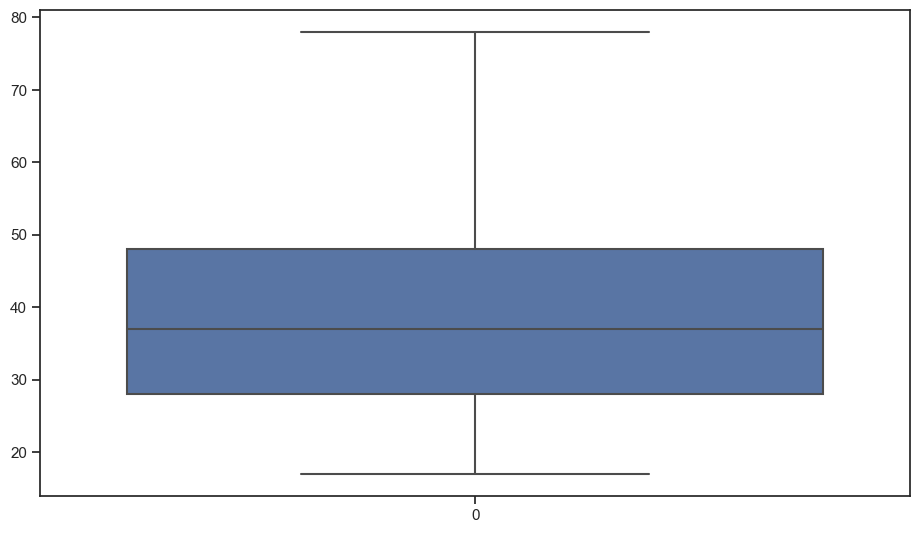

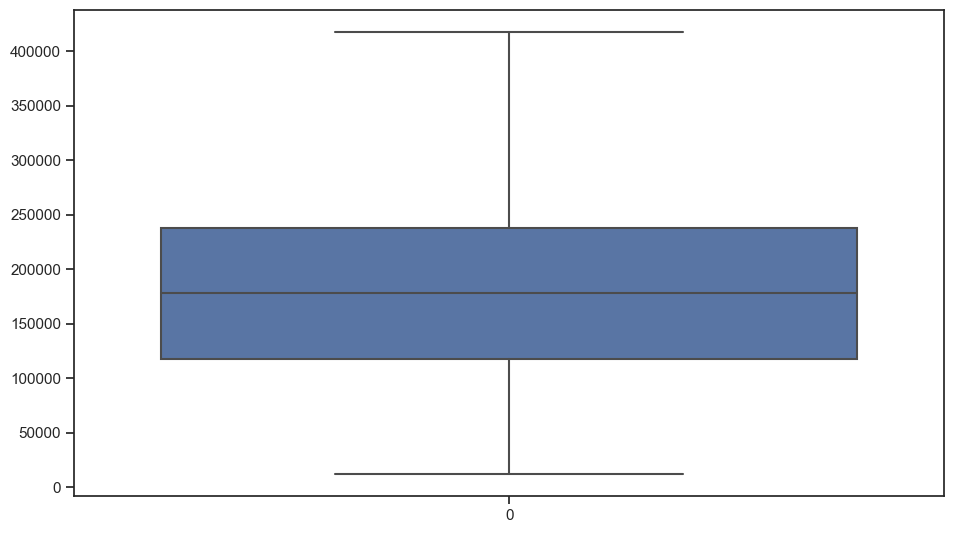

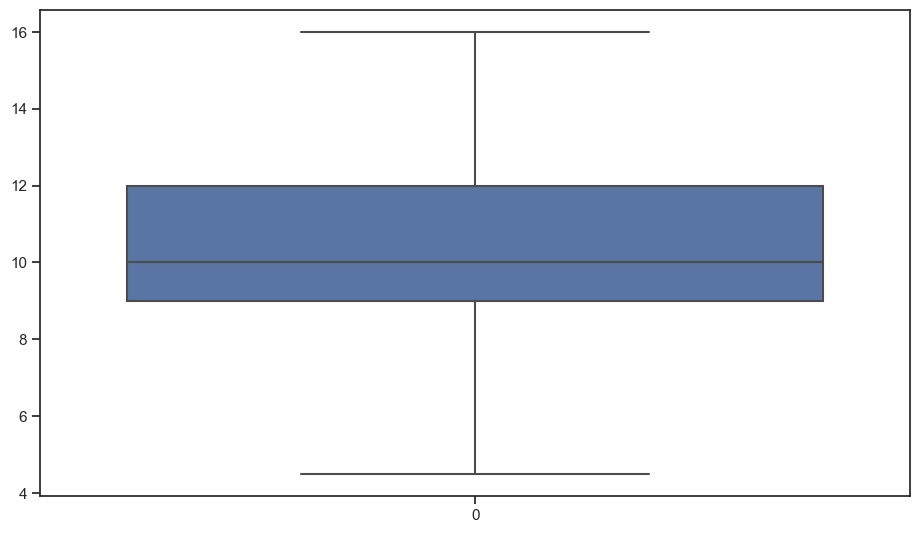

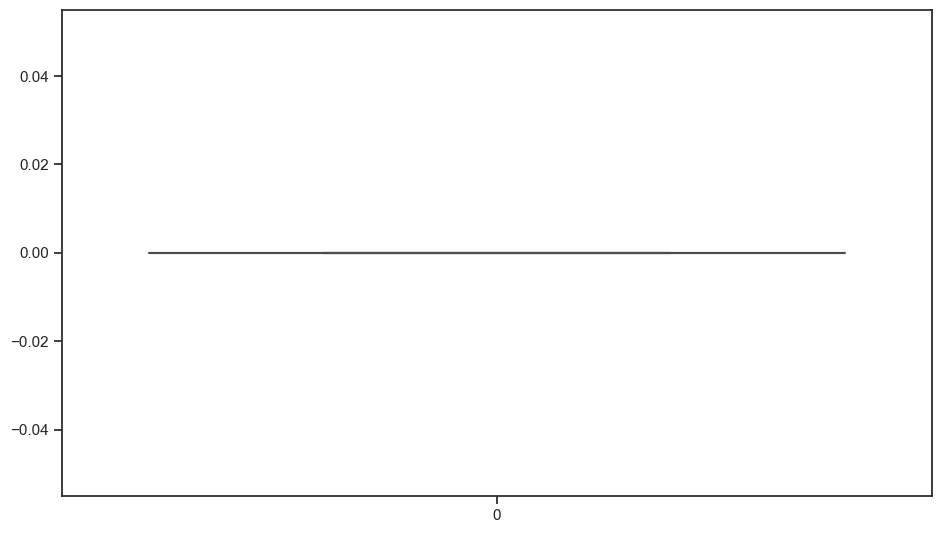

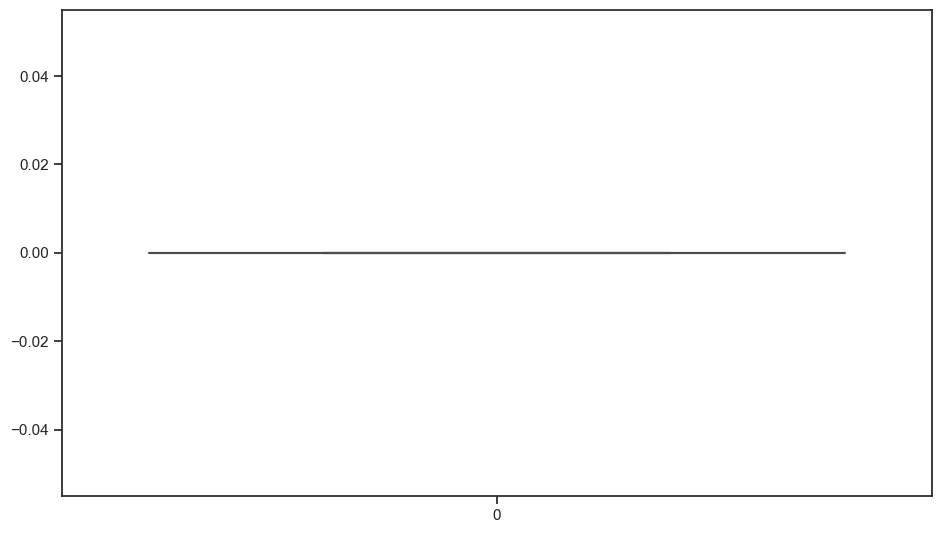

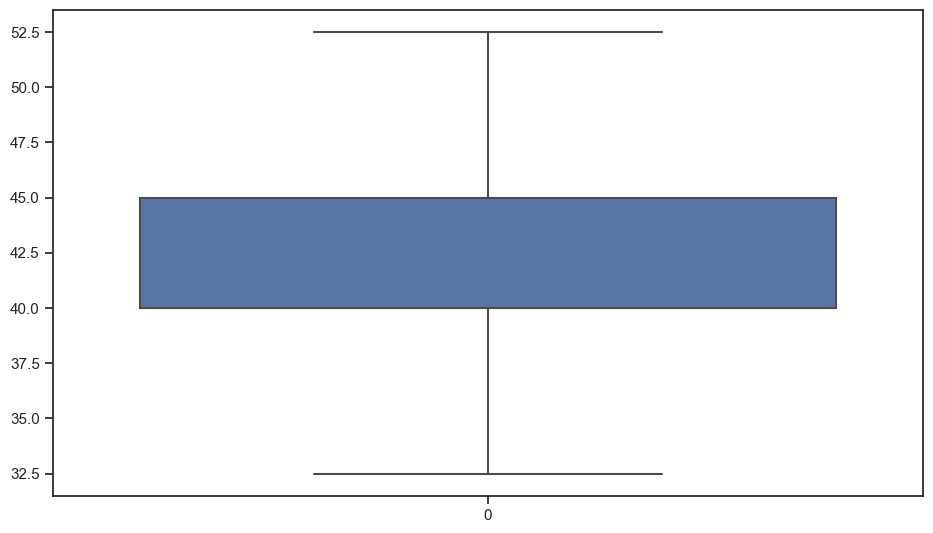

In [26]:
for i in numerical_features:
        plt.figure(figsize=(10,6))
        sns.set_style('ticks')
        ax = sns.boxplot(data[i])

<Axes: xlabel='income'>

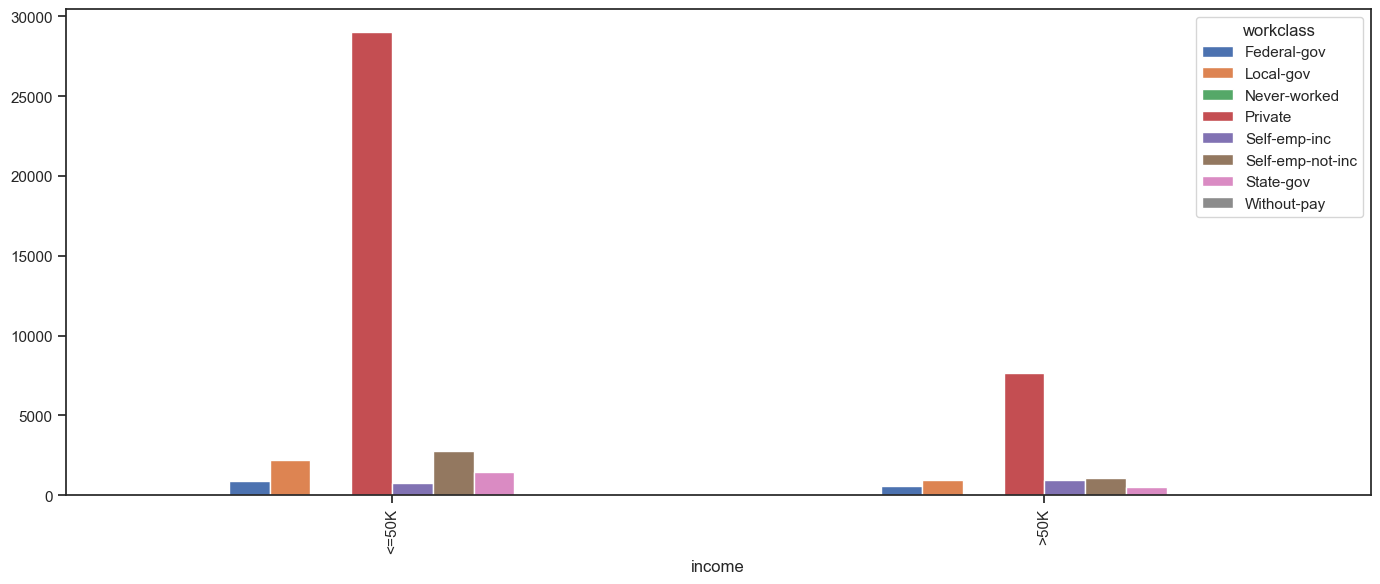

In [27]:
salary = pd.crosstab(data['income'],data['workclass'])
salary.plot(kind='bar')

<Axes: xlabel='income'>

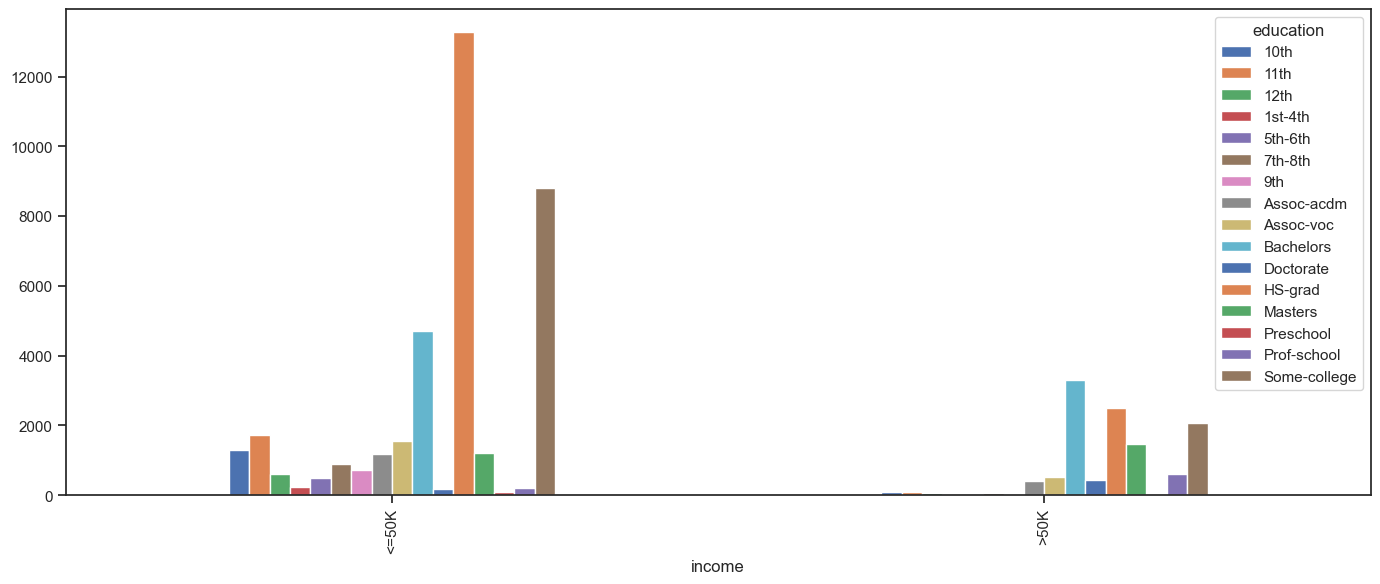

In [28]:
education = pd.crosstab(data['income'],data['education'])
education.plot(kind='bar')

<Axes: xlabel='income'>

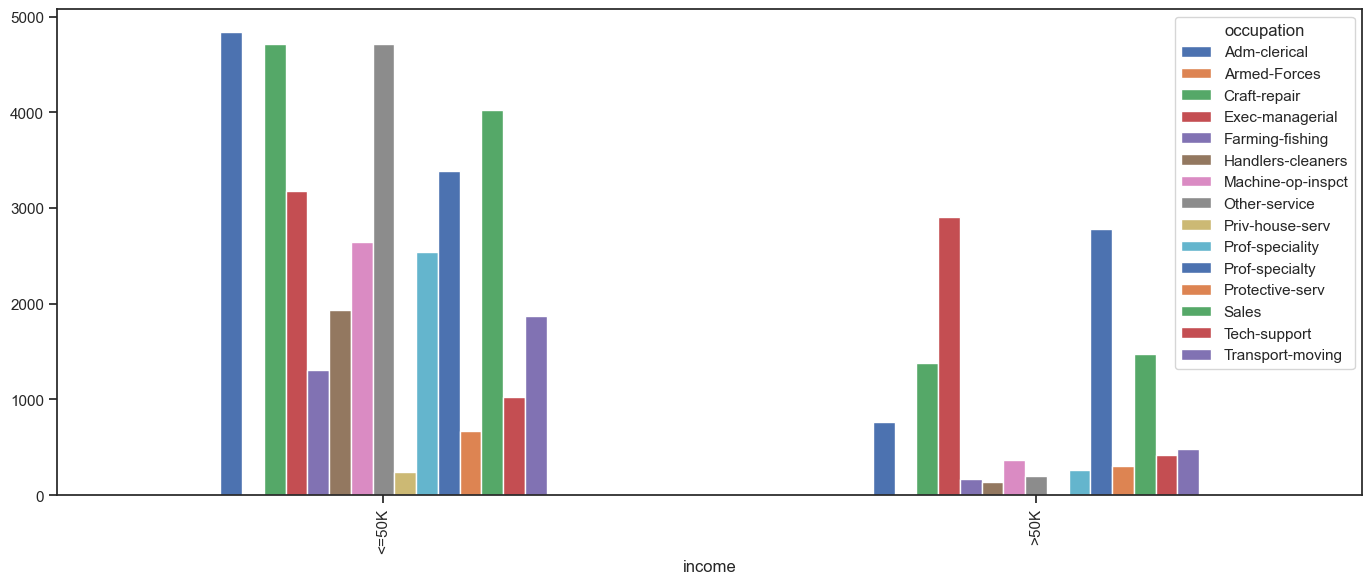

In [29]:
occupation = pd.crosstab(data['income'],data['occupation'])
occupation.plot(kind="bar")

<Axes: xlabel='income'>

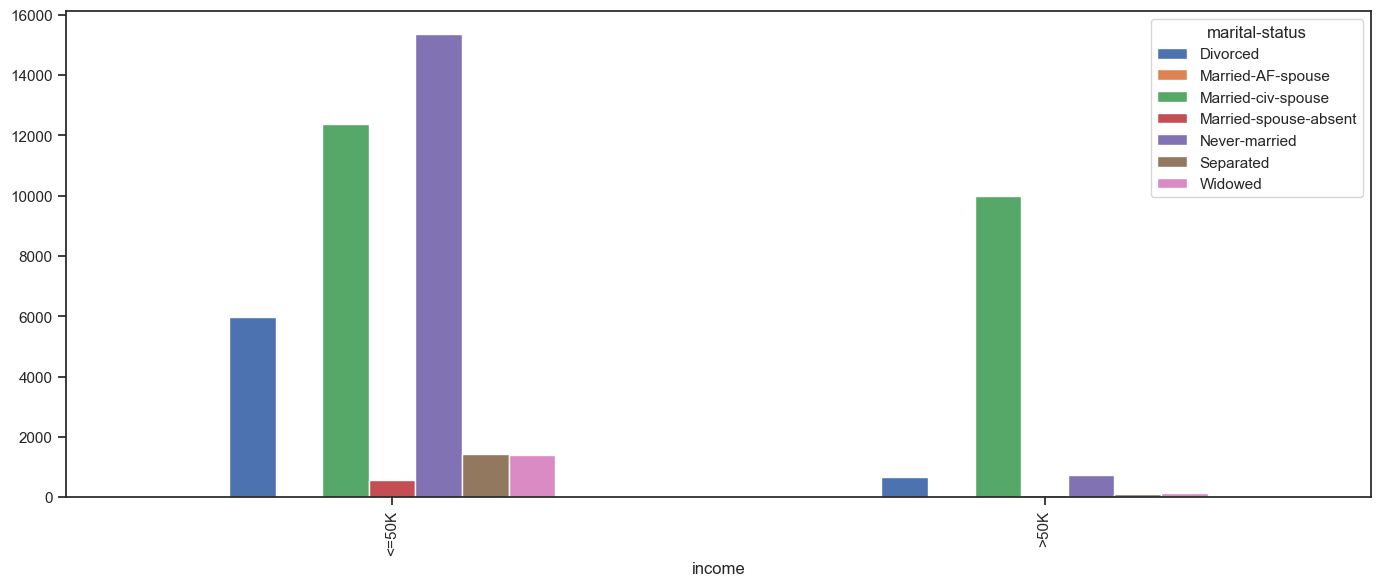

In [30]:
marital = pd.crosstab(data['income'],data['marital-status'])
marital.plot(kind="bar")

<Axes: xlabel='income'>

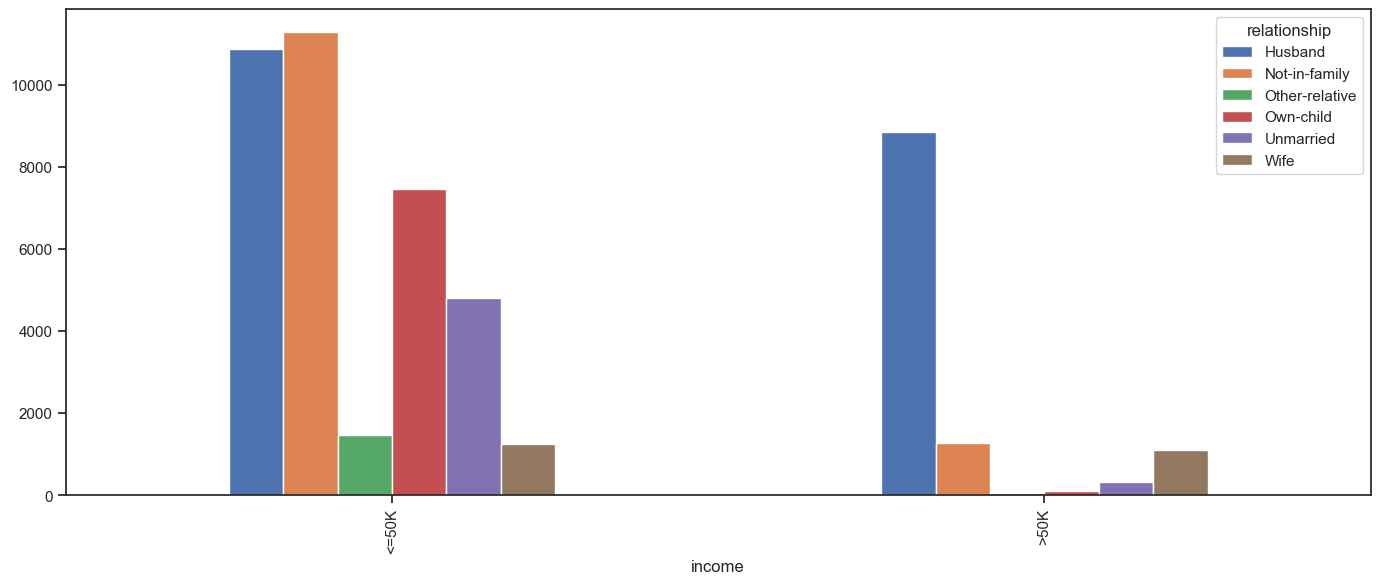

In [31]:
relationship = pd.crosstab(data['income'],data['relationship'])
relationship.plot(kind="bar")

<Axes: xlabel='income'>

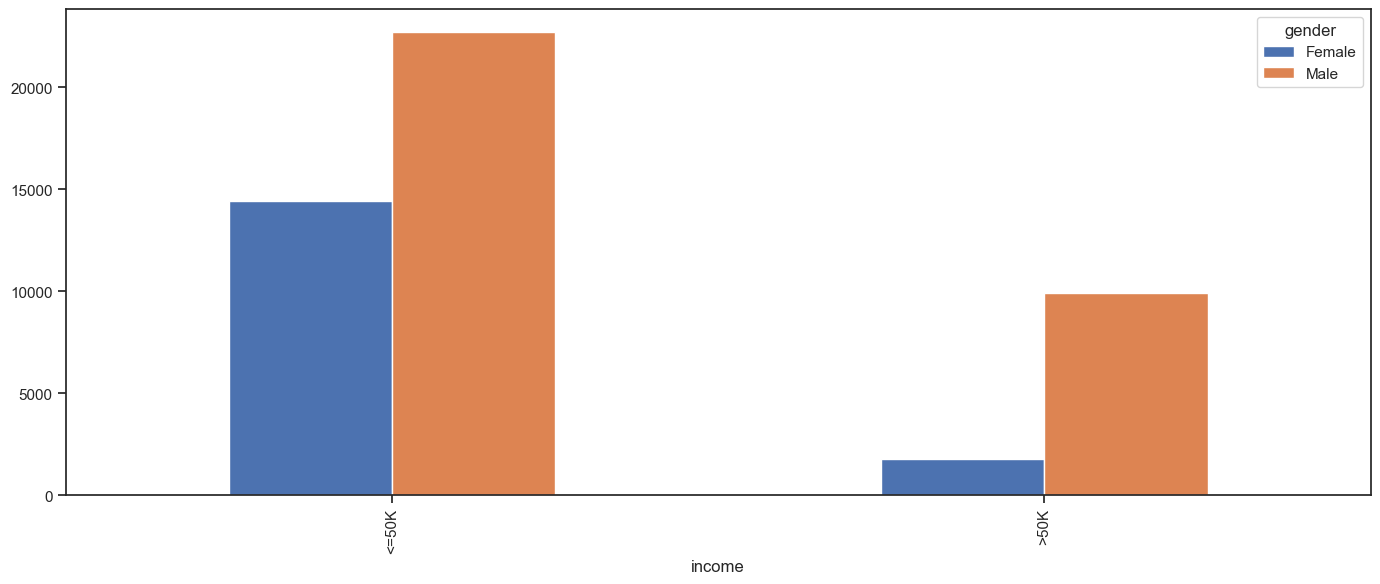

In [32]:
sex = pd.crosstab(data['income'],data['gender'])
sex.plot(kind="bar")

In [33]:
categorical_features

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_features = ['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native_country']

for features in categorical_features:
    le.fit(data[features])
    data[features] = le.transform(data[features])

In [41]:
data["income"] = data["income"].map({'<=50K':0 ,'>50K':1})

<Axes: >

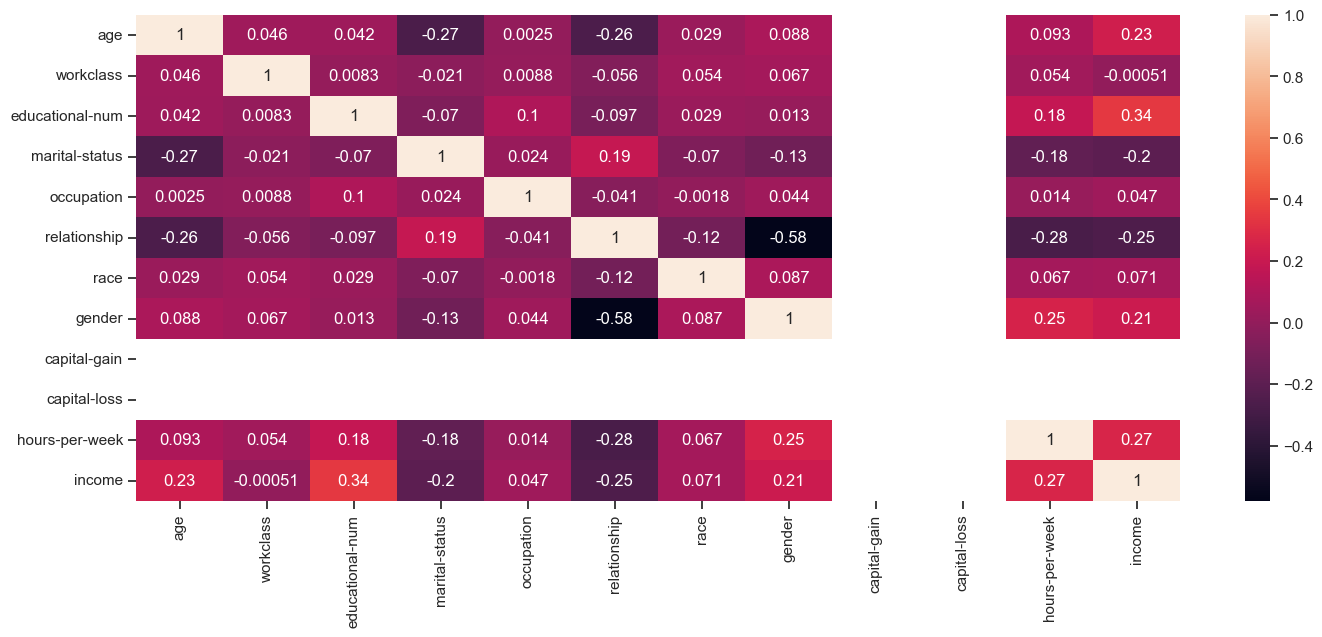

In [47]:
sns.heatmap(data.corr(),annot=True)

In [44]:
data.drop(["education","fnlwgt","native-country","native_country"],axis=1,inplace=True)

In [45]:
data.head()


,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,3,7.0,4,6,3,2,1,0,0,40.0,0
1,38,3,9.0,2,4,0,4,1,0,0,50.0,0
2,28,1,12.0,2,11,0,4,1,0,0,40.0,1
3,44,3,10.0,2,6,0,2,1,0,0,40.0,1
4,18,3,10.0,4,9,3,4,0,0,0,32.5,0


In [42]:
data['income'].value_counts()

income
0    37109
1    11681
Name: count, dtype: int64

In [48]:
data.to_csv("cleandata.csv",index=False)

Model Training

In [49]:
data.shape

(48790, 12)

In [50]:
x = data.drop("income",axis=1)
y = data['income']

In [53]:
categorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(categorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['age', 'workclass', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [55]:
num_pipeline = Pipeline(
steps =[
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler",StandardScaler)
]
)

cat_pipeline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]
)

In [56]:
preprocessor = ColumnTransformer(["num_pipeline",num_pipeline,numerical_features])

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [58]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39032, 11)
(9758, 11)
(39032,)
(9758,)


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report

In [60]:
def performance_metrics(test,predict):
    confusionmatrix = print(f"CONFUSION_METRIC:{confusion_matrix(test,predict)}")

    Precision = print(f"PRECISION SCORE:{precision_score(test,predict)}")

    recallscore = print(f"RECALL_SCORE:{recall_score(test,predict)}")

    f1score = print(f"F!_SCORE:{f1_score(test,predict)}")

    accuracyscore = print(f"ACCURACY_SCORE:{accuracy_score(test,predict)}")

    return confusionmatrix,Precision,recallscore,f1score,accuracyscore

In [61]:
lr = LogisticRegression()

In [62]:
param = {
"class_weight":["balanced"],
'penalty':['l1','l2'],
'C':[0.001,0.01,0.1,1,10,100],
'solver':['liblinear','saga']
}

In [63]:
grid = GridSearchCV(estimator=lr,param_grid=param,cv=5,n_jobs=-1,verbose=3)

In [64]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=3)

In [65]:
grid.best_params_

{'C': 100, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [66]:
grid.score(X_train,y_train)

0.7387784382045501

In [67]:
y_pred = grid.predict(X_test)

In [68]:
accuracy_score(y_test,y_pred)

0.7387784382045501

In [69]:
dr = DecisionTreeClassifier()

In [74]:
param_grid = {
    "class_weight":["balanced"],
    "criterion":['gini','entropy','log_loss'],
    "splitter":['best','random'],
    "max_depth":[3,4,5,0],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3],
    "max_features" :["auto" , "sqrt" , "log2"]
}

In [75]:
grid_search = GridSearchCV(estimator=dr,param_grid=param_grid,cv=5,scoring="accuracy")

In [76]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 0],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [77]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'splitter': 'best'}

In [78]:
grid_search.score(X_train,y_train)

0.7659868825579013

In [79]:
y_pred = grid_search.predict(X_test)

In [80]:
accuracy_score(y_test,y_pred)

0.767882762861242

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.76      0.83      7440
           1       0.51      0.80      0.62      2318

    accuracy                           0.77      9758
   macro avg       0.72      0.78      0.73      9758
weighted avg       0.83      0.77      0.78      9758



In [82]:
rf = RandomForestClassifier()

In [83]:
param_grid = {
    "class_weight":["balanced"],
    "n_estimators":[20,50,30],
    "max_depth":[10,8,5],
    "min_samples_split":[2,5,10]
}

In [84]:
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring="accuracy")

In [85]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'], 'max_depth': [10, 8, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 30]},
             scoring='accuracy')

In [86]:
grid_search.best_params_

{'class_weight': 'balanced',
 'max_depth': 10,
 'min_samples_split': 5,
 'n_estimators': 20}

In [87]:
grid_search.score(X_train,y_train)

0.8038532486165197

In [88]:
y_pred = grid_search.predict(X_test)

In [89]:
accuracy_score(y_test,y_pred)

0.7890961262553802

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      7440
           1       0.54      0.84      0.66      2318

    accuracy                           0.79      9758
   macro avg       0.74      0.81      0.75      9758
weighted avg       0.84      0.79      0.80      9758

